In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
path_project = os.path.dirname(os.path.abspath('.'))
import sys
sys.path.append(os.path.join(path_project, 'src'))
sys.path.append(os.path.join(path_project, 'exp/script'))

img_path = os.path.join(path_project, 'exp', 'img')

import dataset
from mylogger import logger_set_debug
logger_set_debug()

This notebook can visualize record distribution across silos given distribution parameters such as 
- `user_dist`
- `silo_dist`
- `user_alpha`
- `silo_alpha`

# MNIST

In [5]:
random_state = np.random.RandomState(seed=0)
n_users = 100
n_silos = 5
user_dist = 'zipf-iid'
silo_dist = 'zipf'
user_alpha = 0.5
silo_alpha = 2.0
n_labels = 3
dataset_name = 'mnist'

In [6]:
train_dataset, test_dataset, local_dataset_per_silos = dataset.load_dataset(
    random_state, dataset_name, path_project, n_users, n_silos, user_dist, silo_dist, user_alpha, silo_alpha, n_labels, is_simulation=True
)
user_silo_ids = {
    "user_id": [],
    "silo_id": []
}
user_labels = {i: set() for i in range(n_users)}

for silo_id in local_dataset_per_silos.keys():
    train, test, user_hist, user_ids = local_dataset_per_silos[silo_id]
    labels = [ d[1] for d in train ]
    for user_id, label in zip(user_ids, labels):
        user_silo_ids["user_id"].append(user_id)
        user_silo_ids["silo_id"].append(silo_id)
        user_labels[user_id].add(label)
# user_labels
counts_user_silo = { (user_id, silo_id): 0 for user_id in range(n_users) for silo_id in range(n_silos) }
for user_id, silo_id in zip(user_silo_ids["user_id"], user_silo_ids["silo_id"]):
    counts_user_silo[(user_id, silo_id)] += 1
for key, c in counts_user_silo.items():
    if c <= 0:
        print(key, c)

[00:22:28 DEBUG] Start prepare dataset...
[00:22:32 DEBUG] ALL dataset Percentile of #User's record 0%: 3210, 25%: 635, 50%: 448, 75%: 368, 100%: 312
[00:22:32 DEBUG] Silo id: 0, #records = 9992, #users = 100
[00:22:32 DEBUG] Percentile of #User's record 0%: 1345, 25%: 78, 50%: 24, 75%: 13, 100%: 3
[00:22:32 DEBUG] Silo id: 1, #records = 9320, #users = 100
[00:22:32 DEBUG] Percentile of #User's record 0%: 433, 25%: 128, 50%: 41, 75%: 22, 100%: 2
[00:22:32 DEBUG] Silo id: 2, #records = 10174, #users = 100
[00:22:32 DEBUG] Percentile of #User's record 0%: 1000, 25%: 113, 50%: 42, 75%: 18, 100%: 6
[00:22:32 DEBUG] Silo id: 3, #records = 10245, #users = 100
[00:22:32 DEBUG] Percentile of #User's record 0%: 1178, 25%: 86, 50%: 37, 75%: 17, 100%: 5
[00:22:32 DEBUG] Silo id: 4, #records = 14266, #users = 100
[00:22:32 DEBUG] Percentile of #User's record 0%: 1950, 25%: 223, 50%: 38, 75%: 20, 100%: 7


<Axes: xlabel='user_id', ylabel='Count'>

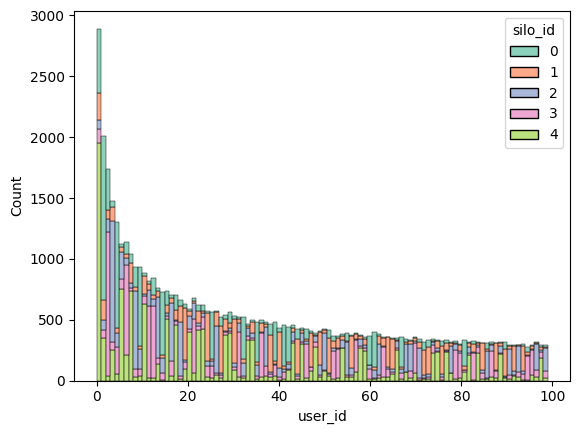

In [7]:
sns.histplot(data=user_silo_ids, x='user_id', hue='silo_id', multiple='stack', palette='Set2', bins=n_users)

## Creditcard

In [22]:
random_state = np.random.RandomState(seed=0)
n_users = 100
n_silos = 5
user_dist = 'zipf'
silo_dist = 'zipf'
user_alpha = 0.5
silo_alpha = 2.0
n_labels = 1
dataset_name = 'creditcard'

[18:51:12 DEBUG] Start prepare dataset...
[18:51:13 DEBUG] ALL dataset Percentile of #User's record 0%: 1315, 25%: 260, 50%: 190, 75%: 153, 100%: 116
[18:51:13 DEBUG] Silo id: 0, #records = 3545, #users = 99
[18:51:13 DEBUG] Percentile of #User's record 0%: 171, 25%: 35, 50%: 15, 75%: 8, 100%: 0
[18:51:13 DEBUG] Silo id: 1, #records = 3637, #users = 100
[18:51:13 DEBUG] Percentile of #User's record 0%: 145, 25%: 51, 50%: 12, 75%: 6, 100%: 1
[18:51:13 DEBUG] Silo id: 2, #records = 4792, #users = 99
[18:51:13 DEBUG] Percentile of #User's record 0%: 835, 25%: 40, 50%: 18, 75%: 7, 100%: 0
[18:51:13 DEBUG] Silo id: 3, #records = 5499, #users = 100
[18:51:13 DEBUG] Percentile of #User's record 0%: 571, 25%: 39, 50%: 18, 75%: 7, 100%: 2
[18:51:13 DEBUG] Silo id: 4, #records = 4651, #users = 100
[18:51:13 DEBUG] Percentile of #User's record 0%: 474, 25%: 62, 50%: 19, 75%: 8, 100%: 1


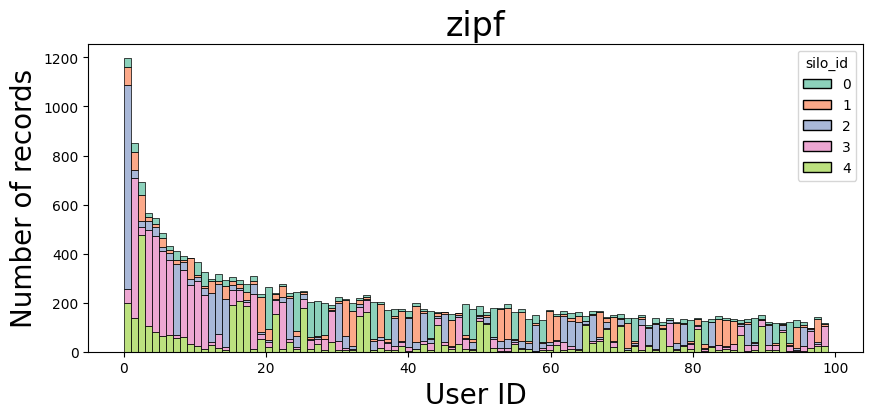

In [23]:
train_dataset, test_dataset, local_dataset_per_silos = dataset.load_dataset(
    random_state, dataset_name, path_project, n_users, n_silos, user_dist, silo_dist, user_alpha, silo_alpha, n_labels, is_simulation=True
)
user_silo_ids = {
    "user_id": [],
    "silo_id": []
}
user_labels = {i: set() for i in range(n_users)}

for silo_id in local_dataset_per_silos.keys():
    train, test, user_hist, user_ids = local_dataset_per_silos[silo_id]
    labels = [ d[1] for d in train ]
    for user_id, label in zip(user_ids, labels):
        user_silo_ids["user_id"].append(user_id)
        user_silo_ids["silo_id"].append(silo_id)
        user_labels[user_id].add(label)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_ylabel("Number of records", fontsize=20)
ax.set_xlabel("User ID", fontsize=20)
ax.set_title("zipf", fontsize=24)
sns.histplot(data=user_silo_ids, x='user_id', hue='silo_id', multiple='stack', palette='Set2', bins=100, ax=ax)
fig.savefig(
    os.path.join(img_path, f"record_distribution_creditcard_100_{user_dist}" + ".png"),
    dpi=150,
    bbox_inches="tight",
)


[18:50:56 DEBUG] Start prepare dataset...
[18:50:57 DEBUG] ALL dataset Percentile of #User's record 0%: 246, 25%: 246, 50%: 246, 75%: 246, 100%: 246
[18:50:57 DEBUG] Silo id: 0, #records = 4425, #users = 100
[18:50:57 DEBUG] Percentile of #User's record 0%: 59, 25%: 48, 50%: 44, 75%: 40, 100%: 29
[18:50:57 DEBUG] Silo id: 1, #records = 4425, #users = 100
[18:50:57 DEBUG] Percentile of #User's record 0%: 57, 25%: 48, 50%: 44, 75%: 40, 100%: 31
[18:50:57 DEBUG] Silo id: 2, #records = 4425, #users = 100
[18:50:57 DEBUG] Percentile of #User's record 0%: 59, 25%: 48, 50%: 44, 75%: 40, 100%: 29
[18:50:57 DEBUG] Silo id: 3, #records = 4425, #users = 100
[18:50:57 DEBUG] Percentile of #User's record 0%: 61, 25%: 48, 50%: 44, 75%: 40, 100%: 31
[18:50:57 DEBUG] Silo id: 4, #records = 4424, #users = 100
[18:50:57 DEBUG] Percentile of #User's record 0%: 59, 25%: 49, 50%: 45, 75%: 40, 100%: 27


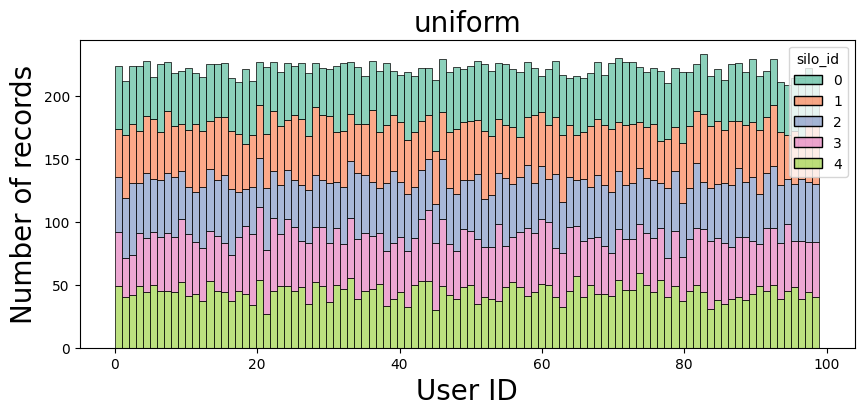

In [21]:
train_dataset, test_dataset, local_dataset_per_silos = dataset.load_dataset(
    random_state, dataset_name, path_project, n_users, n_silos, user_dist, silo_dist, user_alpha, silo_alpha, n_labels, is_simulation=True
)
user_silo_ids = {
    "user_id": [],
    "silo_id": []
}
user_labels = {i: set() for i in range(n_users)}

for silo_id in local_dataset_per_silos.keys():
    train, test, user_hist, user_ids = local_dataset_per_silos[silo_id]
    labels = [ d[1] for d in train ]
    for user_id, label in zip(user_ids, labels):
        user_silo_ids["user_id"].append(user_id)
        user_silo_ids["silo_id"].append(silo_id)
        user_labels[user_id].add(label)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_ylabel("Number of records", fontsize=20)
ax.set_xlabel("User ID", fontsize=20)
ax.set_title("uniform", fontsize=20)
sns.histplot(data=user_silo_ids, x='user_id', hue='silo_id', multiple='stack', palette='Set2', bins=100, ax=ax)
fig.savefig(
    os.path.join(img_path, f"record_distribution_creditcard_100_{user_dist}" + ".png"),
    dpi=150,
    bbox_inches="tight",
)


# Medical

In [2]:
N_SILO = 4
TRAIN_SIZE_LIST = [199, 172, 30, 85]

def build_user_dist(
    n_users: int,
    random_state: np.random.RandomState,
    alpha: float = 1.5,
    user_dist: str = "zipf",
):
    if user_dist == "zipf":
        # Ensure that every user has at least one record
        # Other data is allocated according to the zipf distribution
        n_total = np.sum(TRAIN_SIZE_LIST)

        user_list = np.arange(n_users)
        if n_total < n_users:
            user_id_of_records = np.arange(n_total)
        else:
            # bounded zipf distribution
            x = np.arange(1, n_users + 1)
            weights = x ** (-alpha)
            weights /= weights.sum()
            user_indices_of_data = random_state.choice(
                x, size=n_total - n_users, replace=True, p=weights
            )
            user_indices_of_data = user_indices_of_data - 1
            user_id_of_records = np.concatenate([user_list, user_indices_of_data])
        random_state.shuffle(user_id_of_records)
        user_id_of_records = user_id_of_records.tolist()
        _, count_per_user = np.unique(user_id_of_records, return_counts=True)

        user_ids_per_silo = {}
        user_hist_per_silo = {}
        ratios_per_silo = {}
        MAIN_RATIO = 0.8

        for silo_id in range(N_SILO):
            base_ratios = [(1.0 - MAIN_RATIO) / (N_SILO - 1)] * N_SILO
            base_ratios[silo_id] = MAIN_RATIO
            ratios_per_silo[silo_id] = base_ratios

        for user_id in range(n_users):
            count = count_per_user[user_id]
            selected_silo = random_state.choice(N_SILO)
            silo_ids = random_state.choice(
                N_SILO, size=count, replace=True, p=ratios_per_silo[selected_silo]
            )
            for silo_id in silo_ids:
                if silo_id not in user_ids_per_silo:
                    user_ids_per_silo[silo_id] = []
                # if the number of records in the silo is larger than the limit, choose another silo
                while len(user_ids_per_silo[silo_id]) >= TRAIN_SIZE_LIST[silo_id]:
                    silo_id = (silo_id + 1) % N_SILO
                if silo_id not in user_ids_per_silo:
                    user_ids_per_silo[silo_id] = []
                if silo_id not in user_hist_per_silo:
                    user_hist_per_silo[silo_id] = {}
                if user_id not in user_hist_per_silo[silo_id]:
                    user_hist_per_silo[silo_id][user_id] = 0

                user_ids_per_silo[silo_id].append(user_id)
                user_hist_per_silo[silo_id][user_id] += 1

    elif user_dist == "uniform":
        user_ids_per_silo = {}
        user_hist_per_silo = {}
        for silo_id in range(N_SILO):
            user_ids_per_silo[silo_id] = []
            user_hist_per_silo[silo_id] = {}
        random_selected_user_ids = random_state.choice(
            n_users, size=np.sum(TRAIN_SIZE_LIST), replace=True
        )
        cursor = 0
        for silo_id, size in enumerate(TRAIN_SIZE_LIST):
            for _ in range(size):
                user_id = random_selected_user_ids[cursor]
                cursor += 1
                user_ids_per_silo[silo_id].append(user_id)
                if user_id not in user_hist_per_silo[silo_id]:
                    user_hist_per_silo[silo_id][user_id] = 0
                user_hist_per_silo[silo_id][user_id] += 1

    user_dist_per_silo = {}
    for silo_id in range(N_SILO):
        user_dist_per_silo[silo_id] = (
            user_hist_per_silo[silo_id],
            user_ids_per_silo[silo_id],
        )

    return user_dist_per_silo


In [4]:
random_state = np.random.RandomState(seed=0)
alpha = 0.5
n_users = 30
user_dist = "uniform"
user_dist_per_silo = build_user_dist(n_users=n_users, random_state=random_state, alpha=alpha, user_dist=user_dist)

user_silo_ids = {
    "user_id": [],
    "silo_id": []
}

count_per_silo = {i : 0 for i in range(N_SILO)}

for silo_id, (_, user_ids) in user_dist_per_silo.items():
    for user_id in user_ids:
        user_silo_ids["user_id"].append(user_id)
        user_silo_ids["silo_id"].append(silo_id)
        count_per_silo[silo_id] += 1


{0: 199, 1: 172, 2: 30, 3: 85}

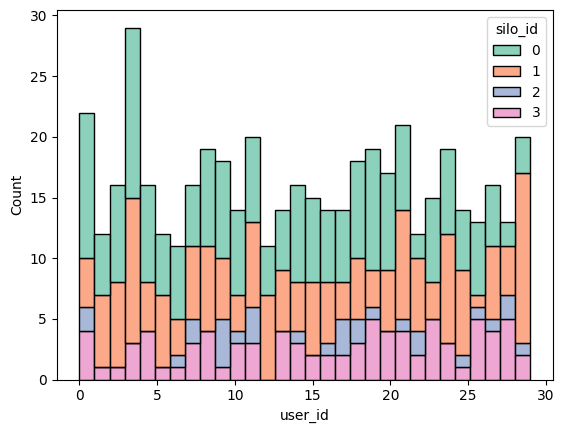

In [5]:
sns.histplot(data=user_silo_ids, x='user_id', hue='silo_id', multiple='stack', palette='Set2', bins=n_users)
count_per_silo

In [15]:
N_SILO = 6
TRAIN_SIZE_LIST = [248, 156, 164, 129, 129, 40]


def build_user_dist(
    n_users: int,
    random_state: np.random.RandomState,
    alpha: float = 1.5,
    user_dist: str = "zipf",
):
    if user_dist == "zipf":
        # Ensure that every user has at least one record
        # Other data is allocated according to the zipf distribution
        n_total = np.sum(TRAIN_SIZE_LIST)

        user_list = np.arange(n_users)
        user_list = np.concatenate((user_list, user_list))
        if n_total < n_users * 2:
            ValueError(
                "The number of users * 2 is larger than the total number of records"
            )
        else:
            # bounded zipf distribution
            x = np.arange(1, n_users + 1)
            weights = x ** (-alpha)
            weights /= weights.sum()
            user_indices_of_data = random_state.choice(
                x, size=n_total - 2 * n_users, replace=True, p=weights
            )
            user_indices_of_data = user_indices_of_data - 1
            user_id_of_records = np.concatenate([user_list, user_indices_of_data])
        random_state.shuffle(user_id_of_records)
        user_id_of_records = user_id_of_records.tolist()
        _, count_per_user = np.unique(user_id_of_records, return_counts=True)

        user_ids_per_silo = {}
        user_hist_per_silo = {}
        ratios_per_silo = {}
        MAIN_RATIO = 0.9

        for silo_id in range(N_SILO):
            base_ratios = [(1.0 - MAIN_RATIO) / (N_SILO - 1)] * N_SILO
            base_ratios[silo_id] = MAIN_RATIO
            ratios_per_silo[silo_id] = base_ratios

        for user_id in range(n_users):
            count = count_per_user[user_id]
            selected_silo = random_state.choice(N_SILO)
            silo_ids = random_state.choice(
                N_SILO, size=count, replace=True, p=ratios_per_silo[selected_silo]
            )
            silo_ids = increase_min_count(silo_ids, random_state)
            for silo_id in silo_ids:
                if silo_id not in user_ids_per_silo:
                    user_ids_per_silo[silo_id] = []
                # if the number of records in the silo is larger than the limit, choose another silo
                while len(user_ids_per_silo[silo_id]) >= TRAIN_SIZE_LIST[silo_id]:
                    silo_id = (silo_id + 1) % N_SILO
                if silo_id not in user_ids_per_silo:
                    user_ids_per_silo[silo_id] = []
                if silo_id not in user_hist_per_silo:
                    user_hist_per_silo[silo_id] = {}
                if user_id not in user_hist_per_silo[silo_id]:
                    user_hist_per_silo[silo_id][user_id] = 0

                user_ids_per_silo[silo_id].append(user_id)
                user_hist_per_silo[silo_id][user_id] += 1

    elif user_dist == "uniform":
        user_ids_per_silo = {}
        user_hist_per_silo = {}
        for silo_id in range(N_SILO):
            user_ids_per_silo[silo_id] = []
            user_hist_per_silo[silo_id] = {}
        random_selected_user_ids = random_state.choice(
            n_users, size=int(np.sum(TRAIN_SIZE_LIST) / 2), replace=True
        )
        cursor = -1
        for silo_id, size in enumerate(TRAIN_SIZE_LIST):
            for _ in range(int(size / 2)):
                cursor += 1
                user_id = random_selected_user_ids[cursor]
                user_ids_per_silo[silo_id].append(user_id)
                user_ids_per_silo[silo_id].append(user_id)
                if user_id not in user_hist_per_silo[silo_id]:
                    user_hist_per_silo[silo_id][user_id] = 0
                user_hist_per_silo[silo_id][user_id] += 2
            if size % 2 == 1:
                user_id = random_selected_user_ids[cursor]
                user_ids_per_silo[silo_id].append(user_id)
                user_hist_per_silo[silo_id][user_id] += 1
    else:
        raise ValueError("Unknown user distribution: {}".format(user_dist))

    user_dist_per_silo = {}
    for silo_id in range(N_SILO):
        random_state.shuffle(user_ids_per_silo[silo_id])
        user_dist_per_silo[silo_id] = (
            user_hist_per_silo[silo_id],
            user_ids_per_silo[silo_id],
        )

    return user_dist_per_silo


def increase_min_count(silo_ids: list, random_state: np.random.RandomState):
    new_silo_ids = []
    ids, counts = np.unique(silo_ids, return_counts=True)
    over_two = ids[counts >= 2]
    under_two = ids[counts < 2]

    if len(over_two) <= 0:
        increased_id = random_state.choice(under_two)
        over_two = np.array([increased_id])
        under_two = np.delete(under_two, np.where(under_two == increased_id))
        remove_id = random_state.choice(under_two)
        under_two = np.delete(under_two, np.where(under_two == remove_id))

    for i in range(len(silo_ids)):
        if silo_ids[i] in under_two:
            selected_id = random_state.choice(over_two)
            new_silo_ids.append(selected_id)
        else:
            new_silo_ids.append(silo_ids[i])
    return new_silo_ids

In [16]:
alpha = 0.5
n_users = 50
user_dist = "zipf"
user_dist_per_silo = build_user_dist(n_users=n_users, random_state=random_state, alpha=alpha, user_dist=user_dist)
user_silo_ids = {
    "user_id": [],
    "silo_id": []
}

count_per_silo = {i : 0 for i in range(N_SILO)}
distinct_count_per_silo = {i : set() for i in range(N_SILO)}

for silo_id, (_, user_ids) in user_dist_per_silo.items():
    for user_id in user_ids:
        user_silo_ids["user_id"].append(user_id)
        user_silo_ids["silo_id"].append(silo_id)
        count_per_silo[silo_id] += 1
        distinct_count_per_silo[silo_id].add(user_id)

[(0, 20), (1, 12), (2, 21), (3, 8), (4, 1), (5, 3)]


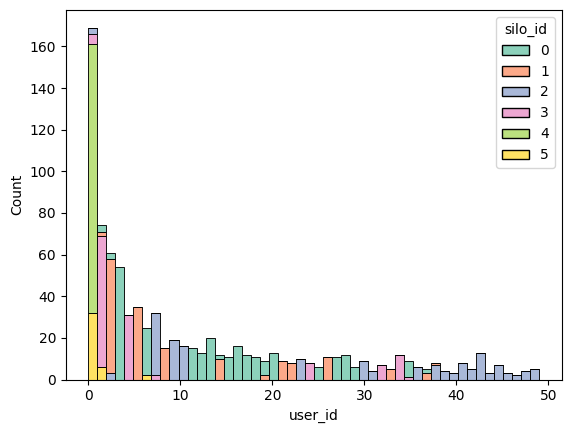

In [61]:
sns.histplot(data=user_silo_ids, x='user_id', hue='silo_id', multiple='stack', palette='Set2', bins=n_users)
print([(silo_id, len(s) ) for silo_id, s in distinct_count_per_silo.items()])